# Problem Statement : 
Build a machine learning model to identify fraudulent credit card Transactions. Preprocess and
normalize the transaction data, handle class imbalance issues, and split the dataset into training and
testing sets.Train a classification algorithm, such as logistic regression or random forests, to classify
transactions as fraudulent or genuine.
Evaluate the model' s performance using metrics like precision, recall, and F1-score, and consider
techniques like oversampling or undersampling for improving results.

In [1]:
import numpy as np 
import pandas as pd 
import time

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew 
from scipy.special import boxcox
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import average_precision_score,precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance



In [2]:
data=pd.read_csv(r"C:\Users\ramiu\Desktop\NeuroNexus\Credit Card Fraud Detection\creditcard.csv")

In [3]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking numerical 
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
print((data.groupby('Class')['Class'].count()/data['Class'].count())*100)
((data.groupby('Class')['Class'].count()/data['Class'].count())*100)


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [9]:
corr=data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [10]:
Delta_Time=pd.to_timedelta(data['Time'],unit='s')

data['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
data['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
data['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [11]:
## drop unneccessary coloumn

data.drop("Time",axis=1,inplace=True)

data.drop(['Time_Day','Time_Min'],axis=1,inplace=True)


# split the data into train test 

In [12]:
y=data['Class']
x=data.drop('Class',axis=1)

In [13]:
x.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.30)

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))


492
345
147


# ModEL Building

In [17]:
df_results=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [18]:
def confusion(y_test,pred_test):
    cm=confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.imshow(cm,interpolation='nearest',camp=plt.Accent)
    categorynames=['Non Fraud','Fraud']
    plt.title("Confusion Matrix Data")
    plt.ylable('True Label')
    plt.xlabel('Predicted Label')
    ticks = np.arange(len(categorynames))
    plt.xticks(ticks,categorynames,rotation=45)
    plt.yticks(ticks,categorynames)
    s=[['TN','FP'],['FN','TP']]
    
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]),fontsize=12)

    plt.show()        


In [19]:
def logistic_model(df_results,Methodology,x_train,y_train,x_test,y_test):

### creating a function for logistic regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C=list(np.power(10.0,np.arange(-10,10)))
  cv_num=KFold(n_splits=10,shuffle=True,random_state=42)

  searchCV_l2 =linear_model.LogisticRegressionCV(
    Cs=num_C
    ,penalty='l2'
    ,scoring='roc_auc'
    ,cv=cv_num
    ,random_state=42
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='newton-cg'
    ,tol=10
)

  searchCV_l1=linear_model.LogisticRegressionCV(
     Cs=num_C
    ,penalty='l1'
    ,scoring='roc_auc'
    ,cv=cv_num
    ,random_state=42
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='liblinear'
    ,tol=10
 )

  searchCV_l1.fit(x_train,y_train)
  searchCV_l2.fit(x_train,y_train)

  print('Max auc_roc for l1:',searchCV_l1.scores_[1].mean(axis=0).max())
  print('Max auc_roc for l2:',searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)


  y_pred_l1 = searchCV_l1.predict(x_test)
  y_pred_l2 = searchCV_l2.predict(x_test)

### find probability
  y_pred_probability_l1 = searchCV_l1.predict_proba(x_test)[:,1]
  y_pred_probability_l2  = searchCV_l2.predict_proba(x_test)[:,1]


#accuracy of l2/l1 models 

  accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1,y_true=y_test)
  accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2,y_true=y_test)


  print("Accuracy of logistic model with l1 regularsation : {0}".format(accuracy_l1))
  print("Confusion Matrix")
  confusion_matrix(y_test,y_pred_l1)
  print("classification Report")
  print(classification_report(y_test,y_pred_l1))

  print("Accuracy of logistic model with l2 regularisation : {0}".format(accuracy_l2))
  print("confusion Mtrix")
  print("Classification Report")
  confusion_matrix(y_test,y_pred_l2)


### calculate roc value 

  l2_roc_value = roc_auc_score(y_test,y_pred_probability_l2)
  print("l2 roc_value: {0}".format(l2_roc_value))
  fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threhsold:{0}".format(threshold))


  roc_auc = metrics.auc(fpr,tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test , auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
   
  df_results = pd.concat([df_results, pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L2 Regulirisation', 'Accuracy': accuracy_l2, 'roc_auc': l2_roc_value, 'threshold': threshold}, index=[0])])
 


  l1_roc_value = roc_auc_score(y_test,y_pred_probability_l1)
  print("l1 roc_value: {0}".format(l1_roc_value))
  fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threhsold:{0}".format(threshold))


  roc_auc = metrics.auc(fpr,tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test , auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()


  #df_results = df_results.concat(pd.DataFrame({'Methodology':Methodology,'Model':'Logistic Regression with L1 Regularisation','Accuracy':accuracy_l2,'roc_auc':l2_roc_value,'threshold':threshold},index=[0]))
  df_results = pd.concat([df_results, pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L1 Regulirisation', 'Accuracy': accuracy_l1, 'roc_auc': l1_roc_value, 'threshold': threshold}, index=[0])])

  
  return df_results
  








In [20]:
### knn model : 


def KNNModels(df_results,Methodology,x_train,y_train,x_test,y_test):


    knn = KNeighborsClassifier(n_neighbors=5,n_jobs=16)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    print("model score")
    print(score)


    ##### Accuracy

    y_pred=knn.predict(x_test)
    KNN_accuracy = metrics.accuracy_score(y_pred,y_test)
    print("confusion Matrix")
    print(classification_report(y_test,y_pred))
     

    #knn_probability=knn.predict(x_test)[:,1]
     # ... (your previous code)

# Class probabilities
    knn_probability = knn.predict_proba(x_test)[:, 1]

# ... (rest of your code)


    #calculate the roc value
    knn_roc_value = roc_auc_score(y_test,knn_probability)
    print("KNN roc_value:{0}".format(knn_roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_probability)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))


    roc_auc =metrics.auc(fpr,tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()


    
    #df_results = df_results.concat(pd.DataFrame({'Methodology':Methodology,'Model':'KNeighrest Neighbour','Accuracy':score,'roc_auc':knn_roc_value,'threshold':threshold},index=[0]))
    df_results = pd.concat([df_results, pd.DataFrame({'Methodology': Methodology, 'Model': 'KNeighrest Neighbour', 'Accuracy': score, 'roc_auc': knn_roc_value, 'threshold': threshold}, index=[0])])
 
    return df_results
  

In [21]:
def DTree(df_results,Methodology,x_train,y_train,x_test,y_test):

    ## defining the gini entropy 
    criteria= ['gini','entropy']
    scores={}

    for c in  criteria :
        dt = DecisionTreeClassifier(criterion=c,random_state=42)
        dt.fit(x_train,y_train)
        y_pred=dt.predict(x_test)
        test_score=dt.score(x_test,y_test)
        tree_preds=dt.predict_proba(x_test)[:,1]
        tree_roc_value=roc_auc_score(y_test,tree_preds)
        scores=test_score
        print(c + " score: {0}".format(test_score))
        print("classification report")
        print(classification_report(y_test,y_pred))
        print(c + "tree_roc_value: {0}".format(tree_roc_value))
        fpr,tpr,thresholds=metrics.roc_curve(y_test,tree_preds)
        threshold=thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold:{0}".format(threshold))
        roc_auc=metrics.auc(fpr,tpr)
        print("ROC VALUE",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()



        #df_results=df_results.concat(pd.DataFrame({'Methodology':Methodology,'Model':'DecisionTreeClassifier'.format(c),'Accuracy':test_score,'roc_value':tree_roc_value},index=[0]))
        df_results = pd.concat([df_results, pd.DataFrame({'Methodology': Methodology, 'Model': 'Tree Model For {0} criteria'.format(c), 'Accuracy': test_score, 'roc_auc': tree_roc_value, 'threshold': threshold}, index=[0])])

      
        return df_results      

        





In [22]:
def RandomForestModel(df_results, Methodology, x_train, y_train, x_test, y_test):
    rf_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=45)

    rf_model.fit(x_train, y_train)
    rf_test_score = rf_model.score(x_test, y_test)

    print('Model Accuracy: {0}'.format(rf_test_score))

    # Class prediction
    rf_prediction = rf_model.predict(x_test)
    print("Classification Report")
    print(classification_report(y_test, rf_prediction))

    # Probability for each class
    rf_probabs = rf_model.predict_proba(x_test)[:, 1]

    # Calculate ROC AUC
    roc_value = roc_auc_score(y_test, rf_probabs)
    print("Random Forest ROC Value: {0}".format(roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probabs)

    # Check if there are any thresholds with zero false positive rate and zero true positive rate
    zero_fpr_tpr = (fpr == 0) & (tpr == 0)

    if np.any(zero_fpr_tpr):
        # Set the threshold to the maximum non-infinite value
        threshold = np.max(thresholds[~np.isinf(thresholds)])
    else:
        threshold = thresholds[np.argmax(fpr - tpr)]

    print("Random Forest Threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_results = pd.concat([df_results, pd.DataFrame({'Methodology': Methodology, 'Model': 'Random Forest', 'Accuracy': rf_test_score, 'roc_auc': roc_value, 'threshold': threshold}, index=[0])])

    return df_results







In [23]:
def XGboostModel(df_results, Methodology, x_train, y_train, x_test, y_test):
    xgbmodel = XGBClassifier(random_state=42)
    xgbmodel.fit(x_train, y_train)
    y_pred = xgbmodel.predict(x_test)
    xgb_test_score = xgbmodel.score(x_test, y_test)
    print('Model Accuracy: {0}'.format(xgb_test_score))

    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # probabilities for each class
    xgb_probabs = xgbmodel.predict_proba(x_test)[:, 1]

    # calculate roc auc value
    xgb_roc_value = roc_auc_score(y_test, xgb_probabs)
    print("XGBoost roc value : {0}".format(xgb_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_probabs)

    # Check if there are any thresholds with zero false positive rate and zero true positive rate
    zero_fpr_tpr = (fpr == 0) & (tpr == 0)
    
    if np.any(zero_fpr_tpr):
        # Set the threshold to the maximum non-infinite value
        threshold = np.max(thresholds[~np.isinf(thresholds)])
    else:
        threshold = thresholds[np.argmax(fpr - tpr)]

    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_results = pd.concat([df_results, pd.DataFrame({'Methodology': Methodology, 'Model': 'XGBoost Classifier', 'Accuracy': xgb_test_score, 'roc_auc': xgb_roc_value, 'threshold': threshold}, index=[0])], ignore_index=True)

    return df_results


# Perform cross validation

In [24]:
from sklearn.model_selection import KFold

kf=KFold(n_splits=5,shuffle=True,random_state=None)

### x is feature and y is target 

for train_index,test_index in kf.split(x,y):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train_cv,x_test_cv=x.iloc[train_index],x.iloc[test_index]
    y_train_cv,y_test_cv=y.iloc[train_index],y.iloc[test_index]

TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2      6 ... 284794 284795 284796]
TRAIN: [     0      1      2 ... 284800 284805 284806] TEST: [     4      8     11 ... 284802 284803 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    14     19     21 ... 284793 284799 284800]
TRAIN: [     1      2      3 ... 284802 284803 284804] TEST: [     0     10     12 ... 284797 284805 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5      7 ... 284781 284786 284798]


KNN Model
model score
0.999350432752234
confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.95      0.69      0.80       107

    accuracy                           1.00     56961
   macro avg       0.97      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value:0.9250636735050822
KNN threshold: 0.2
ROC for the test dataset 92.5%


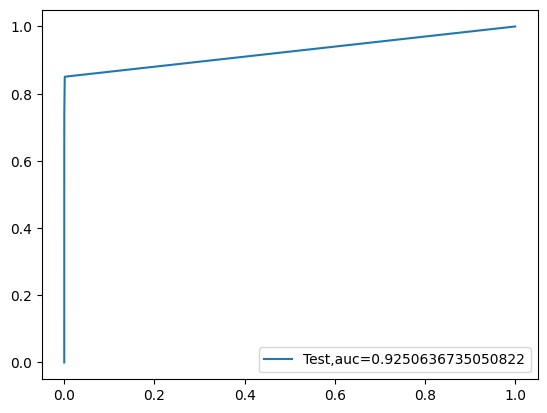

Time taken by Model:  ---65.0247254371643 seconds ---


C:\Users\ramiu\AppData\Local\Temp\ipykernel_21488\2321845825.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame({'Methodology': Methodology, 'Model': 'KNeighrest Neighbour', 'Accuracy': score, 'roc_auc': knn_roc_value, 'threshold': threshold}, index=[0])])


In [25]:
### calculate value for knn model 

import time
print("KNN Model")
start_time=time.time()
df_results=KNNModels(df_results,"cross validation ",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken by Model:  ---%s seconds ---" % (time.time() - start_time))




Logistic Model
Max auc_roc for l1: 0.9734590835217396
Max auc_roc for l2: 0.9817408541015288
Parameters for l1 regularisations
[[-0.05490298 -0.13089219 -0.17746429  0.0637122  -0.25942698  0.09252814
   0.12451205 -0.03424708 -0.14270495 -0.14174067 -0.03628707  0.01129469
  -0.13917989 -0.22096556  0.01517388 -0.11071028 -0.20915589  0.03945018
   0.01191408  0.23893377  0.09034099 -0.02936441  0.0114705  -0.01018828
  -0.02584706  0.00288469 -0.06177596 -0.00768913 -0.0064132  -0.11668961]]
[-2.0999248]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.58666696,
        0.59441875, 0.6192965 , 0.94494794, 0.9298483 , 0.95009956,
        0.92560201, 0.93498805, 0.96765501, 0.94953165, 0.95191024,
        0.95206707, 0.92915326, 0.9673663 , 0.94576417, 0.98375622],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5137736 ,
        0.46499294, 0.47079163, 0.85783743, 0.90831154, 0.90294961,
        0.86672362, 0.87745572, 0.91094718, 0.8921612 , 0.90718806,
       

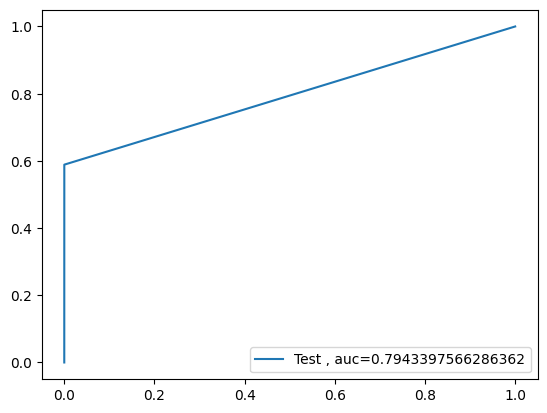

l1 roc_value: 0.9284121420697514
l1 threhsold:1.0
ROC for the test dataset 79.9%


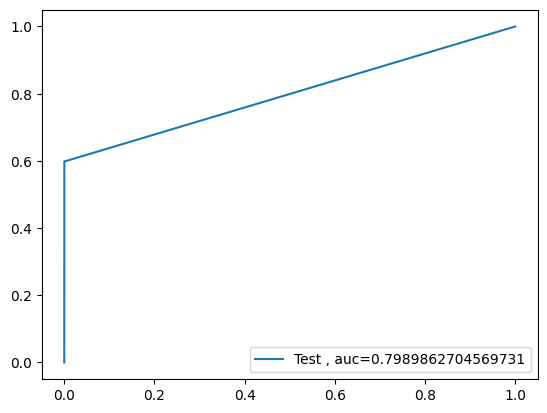

Time taken by Model:  ---311.32706665992737 seconds ---


In [26]:
### calculate value for logistic regression 
import time
print("Logistic Model")
start_time=time.time()
df_results=logistic_model(df_results,"cross validation ",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken by Model:  ---%s seconds ---" % (time.time() - start_time))


Decision Tree Classifier Model with 'gini' & 'entropy' value
gini score: 0.999280209265989
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.79      0.84      0.81       107

    accuracy                           1.00     56961
   macro avg       0.89      0.92      0.91     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.9203496807201524
Tree threshold:1.0
ROC VALUE 92.0%


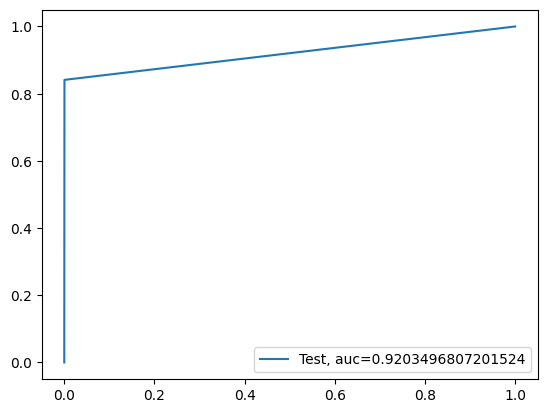

Time taken by Model:  ---33.58264875411987 seconds ---


In [27]:
### calculate value for Decision Tree Classifier Model
import time
print("Decision Tree Classifier Model with 'gini' & 'entropy' value")
start_time=time.time()
df_results=DTree(df_results,"cross validation ",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken by Model:  ---%s seconds ---" % (time.time() - start_time))


Random Forest Model
Model Accuracy: 0.9996664384403364
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.96      0.86      0.91       107

    accuracy                           1.00     56961
   macro avg       0.98      0.93      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC Value: 0.9756093571696515
Random Forest Threshold: 1.0
ROC for the test dataset 97.6%


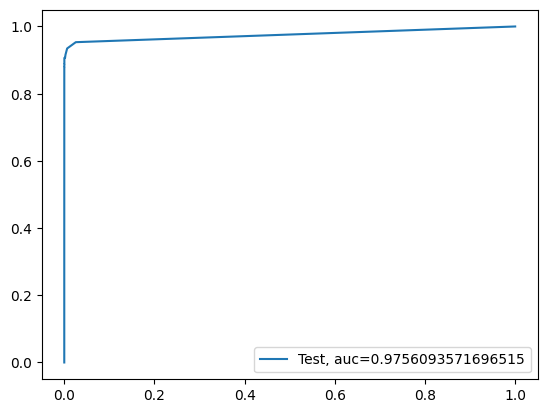

Time taken by Model:  ---483.6194198131561 seconds ---


In [28]:
import time
print("Random Forest Model")
start_time=time.time()
df_results= RandomForestModel(df_results,"cross validation ",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken by Model:  ---%s seconds ---" % (time.time() - start_time))

XGBoost Classifier Model Model
Model Accuracy: 0.9996839943118976
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.96      0.87      0.91       107

    accuracy                           1.00     56961
   macro avg       0.98      0.93      0.96     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc value : 0.985882021468993
XGBoost threshold: 0.9999639987945557
ROC for the test dataset 98.6%


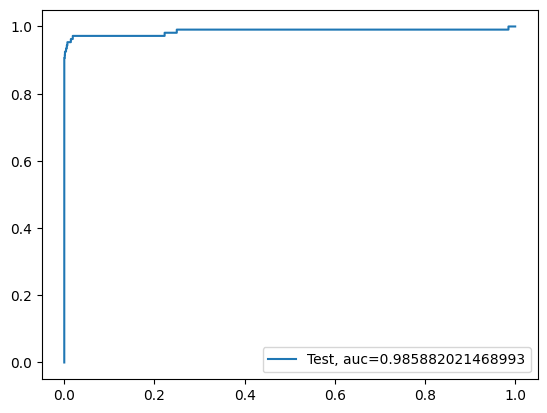

Time taken by Model:  ---2.349527597427368 seconds ---


In [29]:
import time
print("XGBoost Classifier Model Model")
start_time=time.time()
df_results= XGboostModel(df_results,"cross validation ",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken by Model:  ---%s seconds ---" % (time.time() - start_time))

In [30]:
df_results

,Methodology,Model,Accuracy,roc_value,threshold,roc_auc
0,cross validation,KNeighrest Neighbour,0.999350,NaN,0.200000,0.925064
1,cross validation,Logistic Regression with L2 Regulirisation,0.999122,NaN,1.000000,0.989035
2,cross validation,Logistic Regression with L1 Regulirisation,0.999087,NaN,1.000000,0.928412
3,cross validation,Tree Model For gini criteria,0.999280,NaN,1.000000,0.920350
4,cross validation,Random Forest,0.999666,NaN,1.000000,0.975609
5,cross validation,XGBoost Classifier,0.999684,NaN,0.999964,0.985882


In [31]:
# Check if 'roc_value' exists in the DataFrame
if 'roc_value' in df_results.columns:
    # Drop the 'roc_value' column
    df_results = df_results.drop(columns=['roc_value'], axis=1)
    print("Column 'roc_value' dropped successfully.")
else:
    print("Column 'roc_value' not found in the DataFrame.")

# Print the updated DataFrame



Column 'roc_value' dropped successfully.


In [32]:
df_results

,Methodology,Model,Accuracy,threshold,roc_auc
0,cross validation,KNeighrest Neighbour,0.999350,0.200000,0.925064
1,cross validation,Logistic Regression with L2 Regulirisation,0.999122,1.000000,0.989035
2,cross validation,Logistic Regression with L1 Regulirisation,0.999087,1.000000,0.928412
3,cross validation,Tree Model For gini criteria,0.999280,1.000000,0.920350
4,cross validation,Random Forest,0.999666,1.000000,0.975609
5,cross validation,XGBoost Classifier,0.999684,0.999964,0.985882


# Conclusion 

we perform 5 algorithm and after the kfold cross validation we see that the value pf accuracy and roc_auc of L2 regularisation for Logistic Regression give the best outcome .


# Now Handling The Imbalance Data Set Using:

# Random Oversampling :
  Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.



In [33]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler

kf = KFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(kf.split(x, y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    
    rosampling = RandomOverSampler(sampling_strategy=0.5)
    x_ro, y_ro = rosampling.fit_resample(x_train, y_train)

    cols = x.columns  # Assuming cols represents the column names of your DataFrame
    x_ro = pd.DataFrame(data=x_ro, columns=cols)
    
    # Rest of your code for model training and evaluation...
                        

KNN Model
model score
0.9980688541282632
confusion Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.36      0.59      0.44        75

    accuracy                           1.00     56961
   macro avg       0.68      0.79      0.72     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value:0.806107771097751
KNN threshold: 0.2
ROC for the test dataset 80.6%


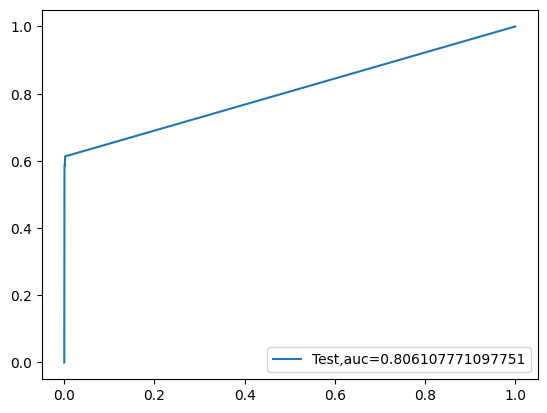


Decision Tree 
gini score: 0.9991924299081828
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.72      0.64      0.68        75

    accuracy                           1.00     56961
   macro avg       0.86      0.82      0.84     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8198329993319974
Tree threshold:1.0
ROC VALUE 82.0%


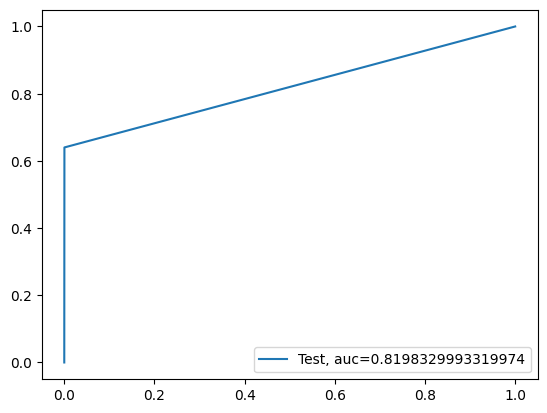



Random Forest Classification Model
Model Accuracy: 0.9996313266972139
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.98      0.73      0.84        75

    accuracy                           1.00     56961
   macro avg       0.99      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC Value: 0.9565031818022008
Random Forest Threshold: 0.99
ROC for the test dataset 95.7%


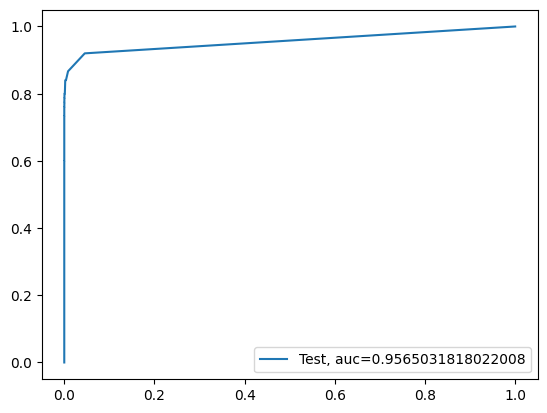

XGBoost Model
Model Accuracy: 0.9995786590825302
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.90      0.76      0.83        75

    accuracy                           1.00     56961
   macro avg       0.95      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc value : 0.9881065054084778
XGBoost threshold: 0.9999996423721313
ROC for the test dataset 98.8%


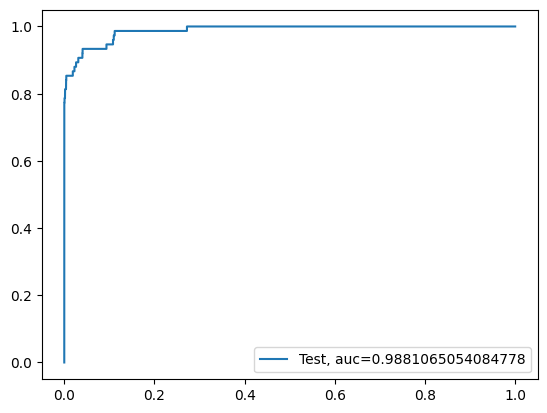

In [34]:


##### knn random oversapmling 

print("KNN Model")
start_time=time.time()
df_results=KNNModels(df_results,"Random Oversapmling With KFold CV",x_ro,y_ro,x_test,y_test)
print()

##### decision Tree Model

print("Decision Tree ")
start_time=time.time()
df_results=DTree(df_results,"Random Oversapmling With KFold CV",x_ro,y_ro,x_test,y_test)
print()
print()

print("Random Forest Classification Model")
start_time=time.time()
df_results=RandomForestModel(df_results,"Random Oversapmling With KFold CV",x_ro,y_ro,x_test,y_test)
###### XGBoost Model
print("XGBoost Model")
df_results=XGboostModel(df_results,"Random Oversapmling With KFold CV",x_ro,y_ro,x_test,y_test)
print()
print()





In [35]:
df_results

,Methodology,Model,Accuracy,threshold,roc_auc
0,cross validation,KNeighrest Neighbour,0.999350,0.200000,0.925064
1,cross validation,Logistic Regression with L2 Regulirisation,0.999122,1.000000,0.989035
2,cross validation,Logistic Regression with L1 Regulirisation,0.999087,1.000000,0.928412
3,cross validation,Tree Model For gini criteria,0.999280,1.000000,0.920350
4,cross validation,Random Forest,0.999666,1.000000,0.975609
5,cross validation,XGBoost Classifier,0.999684,0.999964,0.985882
6,Random Oversapmling With KFold CV,KNeighrest Neighbour,0.998069,0.200000,0.806108
7,Random Oversapmling With KFold CV,Tree Model For gini criteria,0.999192,1.000000,0.819833
8,Random Oversapmling With KFold CV,Random Forest,0.999631,0.990000,0.956503
9,Random Oversapmling With KFold CV,XGBoost Classifier,0.999579,1.000000,0.988107


# Results random oversampling with kfold technique :

Looking at the accuracy and roc value we have The XGBoost which gives the best results or output 

# Oversampling Technique With SMOTE oversampling

# What is SMOTE ?
SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [36]:
from sklearn.model_selection import KFold
from imblearn import over_sampling

smt = KFold(n_splits=5,random_state=None)

for fold,(train_index,test_index) in enumerate(smt.split(x,y),1):
    x_train = x.loc[train_index]
    y_train=y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    smote = over_sampling.SMOTE(random_state=0)
    x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)
x_train_smote = pd.DataFrame(data=x_train_smote,columns=cols)    

Logistic Regression With L1 and L2 Regularisation 
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9916174066340708
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

c:\Users\ramiu\Desktop\NeuroNexus\Credit Card Fraud Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ramiu\Desktop\NeuroNexus\Credit Card Fraud Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ramiu\Desktop\NeuroNexus\Credit Card Fraud Detection\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.00      0.00      0.00        75

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of logistic model with l2 regularisation : 0.978318498621864
confusion Mtrix
Classification Report
l2 roc_value: 0.9835556493103165
l2 threhsold:1.0
ROC for the test dataset 92.9%


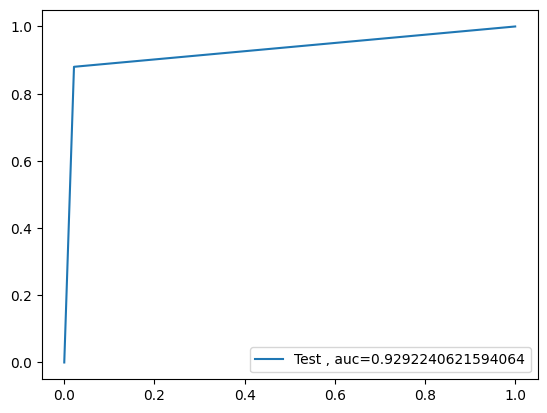

l1 roc_value: 0.5
l1 threhsold:inf
ROC for the test dataset 50.0%


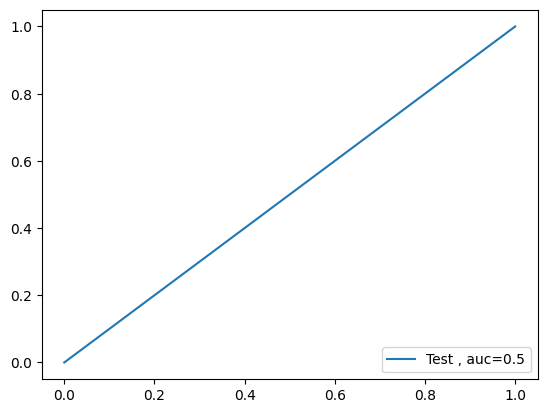

In [37]:
print("Logistic Regression With L1 and L2 Regularisation ")
df_results = logistic_model(df_results,"SMOTE Oversampling With KFold CV",x_train_smote,y_train_smote,x_test,y_test)


KNN Model 


model score
0.9945576798160145
confusion Matrix
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56886
           1       0.16      0.72      0.26        75

    accuracy                           0.99     56961
   macro avg       0.58      0.86      0.63     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value:0.8579041123182036
KNN threshold: 0.6
ROC for the test dataset 85.8%


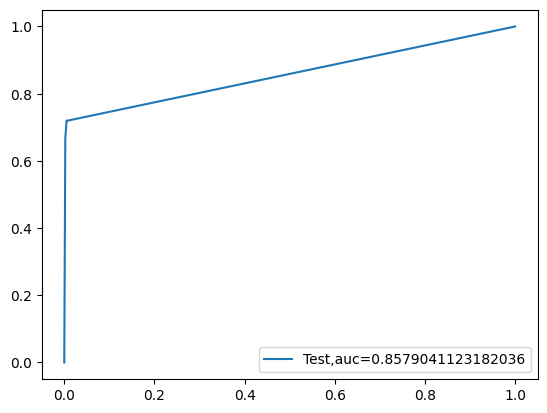

In [38]:
print("KNN Model ")
df_results = KNNModels(df_results,"SMOTE oversapmling with KFold CV",x_train_smote,y_train_smote,x_test,y_test)


Decision Tree Classifier
gini score: 0.9952423588069029
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.18      0.75      0.29        75

    accuracy                           1.00     56961
   macro avg       0.59      0.87      0.65     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8711183771050873
Tree threshold:1.0
ROC VALUE 87.1%


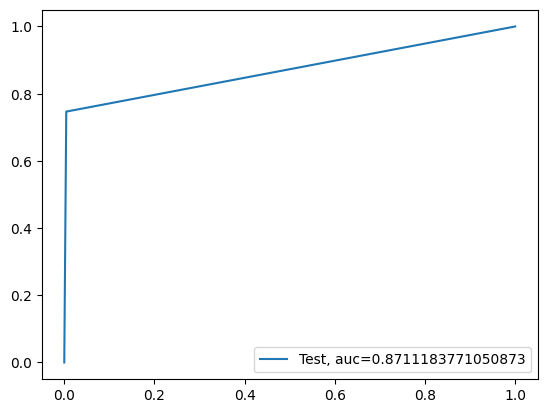

In [39]:
print("Decision Tree Classifier")
df_results = DTree(df_results,"SMOTE Oversampling with KFold CV",x_train_smote,y_train_smote,x_test,y_test)

In [40]:
df_results

,Methodology,Model,Accuracy,threshold,roc_auc
0,cross validation,KNeighrest Neighbour,0.999350,0.200000,0.925064
1,cross validation,Logistic Regression with L2 Regulirisation,0.999122,1.000000,0.989035
2,cross validation,Logistic Regression with L1 Regulirisation,0.999087,1.000000,0.928412
3,cross validation,Tree Model For gini criteria,0.999280,1.000000,0.920350
4,cross validation,Random Forest,0.999666,1.000000,0.975609
5,cross validation,XGBoost Classifier,0.999684,0.999964,0.985882
6,Random Oversapmling With KFold CV,KNeighrest Neighbour,0.998069,0.200000,0.806108
7,Random Oversapmling With KFold CV,Tree Model For gini criteria,0.999192,1.000000,0.819833
8,Random Oversapmling With KFold CV,Random Forest,0.999631,0.990000,0.956503
9,Random Oversapmling With KFold CV,XGBoost Classifier,0.999579,1.000000,0.988107


Random Forest Classification


Model Accuracy: 0.9995786590825302
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.89      0.77      0.83        75

    accuracy                           1.00     56961
   macro avg       0.95      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest ROC Value: 0.9686383292901594
Random Forest Threshold: 1.0
ROC for the test dataset 96.9%


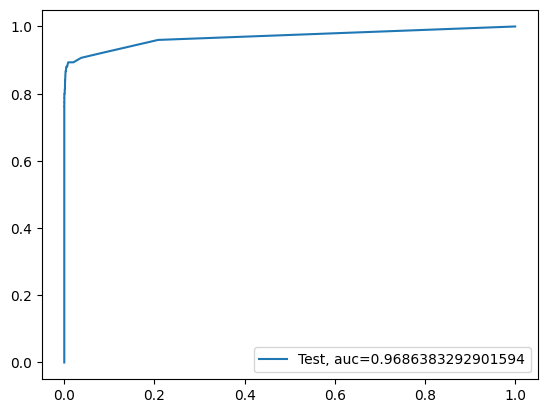

In [41]:
print("Random Forest Classification")
df_results=RandomForestModel(df_results,"SMOTE oversampling with Kfold CV ",x_train_smote,y_train_smote,x_test,y_test)

XGBoost Classifiaction Model
Model Accuracy: 0.9994557679816014
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.81      0.77      0.79        75

    accuracy                           1.00     56961
   macro avg       0.90      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc value : 0.9668464414208533
XGBoost threshold: 0.9999996423721313
ROC for the test dataset 96.7%


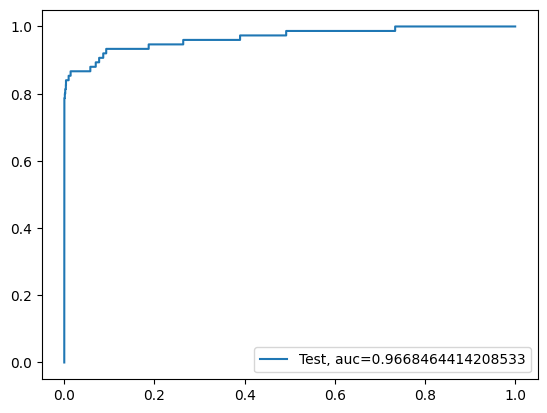

In [42]:
print("XGBoost Classifiaction Model")
df_results=XGboostModel(df_results,"SMOTE oversapmling with KFold CV",x_train_smote,y_train_smote,x_test,y_test)

In [43]:
df_results

,Methodology,Model,Accuracy,threshold,roc_auc
0,cross validation,KNeighrest Neighbour,0.999350,0.200000,0.925064
1,cross validation,Logistic Regression with L2 Regulirisation,0.999122,1.000000,0.989035
2,cross validation,Logistic Regression with L1 Regulirisation,0.999087,1.000000,0.928412
3,cross validation,Tree Model For gini criteria,0.999280,1.000000,0.920350
4,cross validation,Random Forest,0.999666,1.000000,0.975609
5,cross validation,XGBoost Classifier,0.999684,0.999964,0.985882
6,Random Oversapmling With KFold CV,KNeighrest Neighbour,0.998069,0.200000,0.806108
7,Random Oversapmling With KFold CV,Tree Model For gini criteria,0.999192,1.000000,0.819833
8,Random Oversapmling With KFold CV,Random Forest,0.999631,0.990000,0.956503
9,Random Oversapmling With KFold CV,XGBoost Classifier,0.999579,1.000000,0.988107


# Results for SMOTE Oversampling with KFold :
  In the dataframe we can see at Accuracy and ROC value of XGBoost performs best result for SMOTE oversapmpling with KFold Cross Validation Technique 

# Looking at the results of the data frame we easily see that the XGboost Machine Learning Model perform best and i am going to tune the model to get better accuracy

# Hyperparameter Tuning With XGBoost Model 

In [48]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(100, 1000, 100),
    'gamma': [i / 10.0 for i in range(0, 5)],
    'subsample': [i / 10.0 for i in range(7, 10)]
}

gsearchcv = RandomizedSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, max_delta_step=0,
        missing=None, n_jobs=-1,
        nthread=None, objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, verbosity=1
    ),
    param_distributions=param_test, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5
)

gsearchcv.fit(x_ro, y_ro)

print(gsearchcv.cv_results_)
print(gsearchcv.best_params_)
print(gsearchcv.best_score_)


c:\Users\ramiu\Desktop\NeuroNexus\Credit Card Fraud Detection\env\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'mean_fit_time': array([32.67067928, 39.36303463, 51.51022701, 22.13160243, 28.41559815,
       49.22502632, 11.55442591, 19.46843219, 33.27321539, 35.94596777,
       12.6295229 , 56.0633328 , 52.06030931, 59.98817978, 50.71104751,
       43.40450869, 19.95649266, 37.55567889, 50.65662203, 50.64286046,
       35.88277593, 12.80373955, 21.19474759, 65.62641401, 21.49274836,
       49.10332165, 47.78425021, 49.7599515 , 60.81392031, 50.84607215,
       86.06970744, 68.74755769, 32.70352492, 29.93790665, 38.56388822,
       13.67407975, 21.13342848, 64.41732802, 31.68827553, 22.89188848,
       55.74722142, 45.0585917 , 76.20004778, 22.82462039, 15.65608854,
       55.2982275 , 62.88116522, 72.22052822, 30.97917218, 45.19385223]), 'std_fit_time': array([0.88160681, 0.93931749, 0.8003651 , 1.5984546 , 0.1018734 ,
       1.95859895, 0.53728526, 0.44423766, 0.40603711, 0.36725664,
       0.32612413, 0.90129187, 1.09834176, 0.40977345, 0.26485928,
       0.53861446, 0.29918252, 0.55837927, 

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, max_delta_step=0,
                    n_jobs=-1, objective='binary:logistic', random_state=42,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    verbosity=1)

clf.fit(x_ro, y_ro)

xgb_test_score = clf.score(x_test, y_test)

print("Model Accuracy: {0}".format(xgb_test_score))

XGB_probs = clf.predict_proba(x_test)[:, 1]  # Probability of the positive class
XGB_roc_val = roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value: {0}".format(XGB_roc_val))

fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]

print("XGBoost threshold: {0}".format(threshold))


Model Accuracy: 0.9995611032109689
XGBoost roc_value: 0.9820874497533078
XGBoost threshold: 4.411496047396213e-05


# Conclusion 

In the above coding we see that the xgboost modle perform best with the model accuracy of 99% and the roc_value of 0.98208 after performing hyper parameter tuning